<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/House_Price_Predictor_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Load our Dataset
path = "/content/drive/MyDrive/datasets/USA_Housing.csv"
houses = pd.read_csv(path)
houses.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
houses.shape

(5000, 7)

In [ ]:
houses = houses.iloc[:, :-1]

<Axes: >

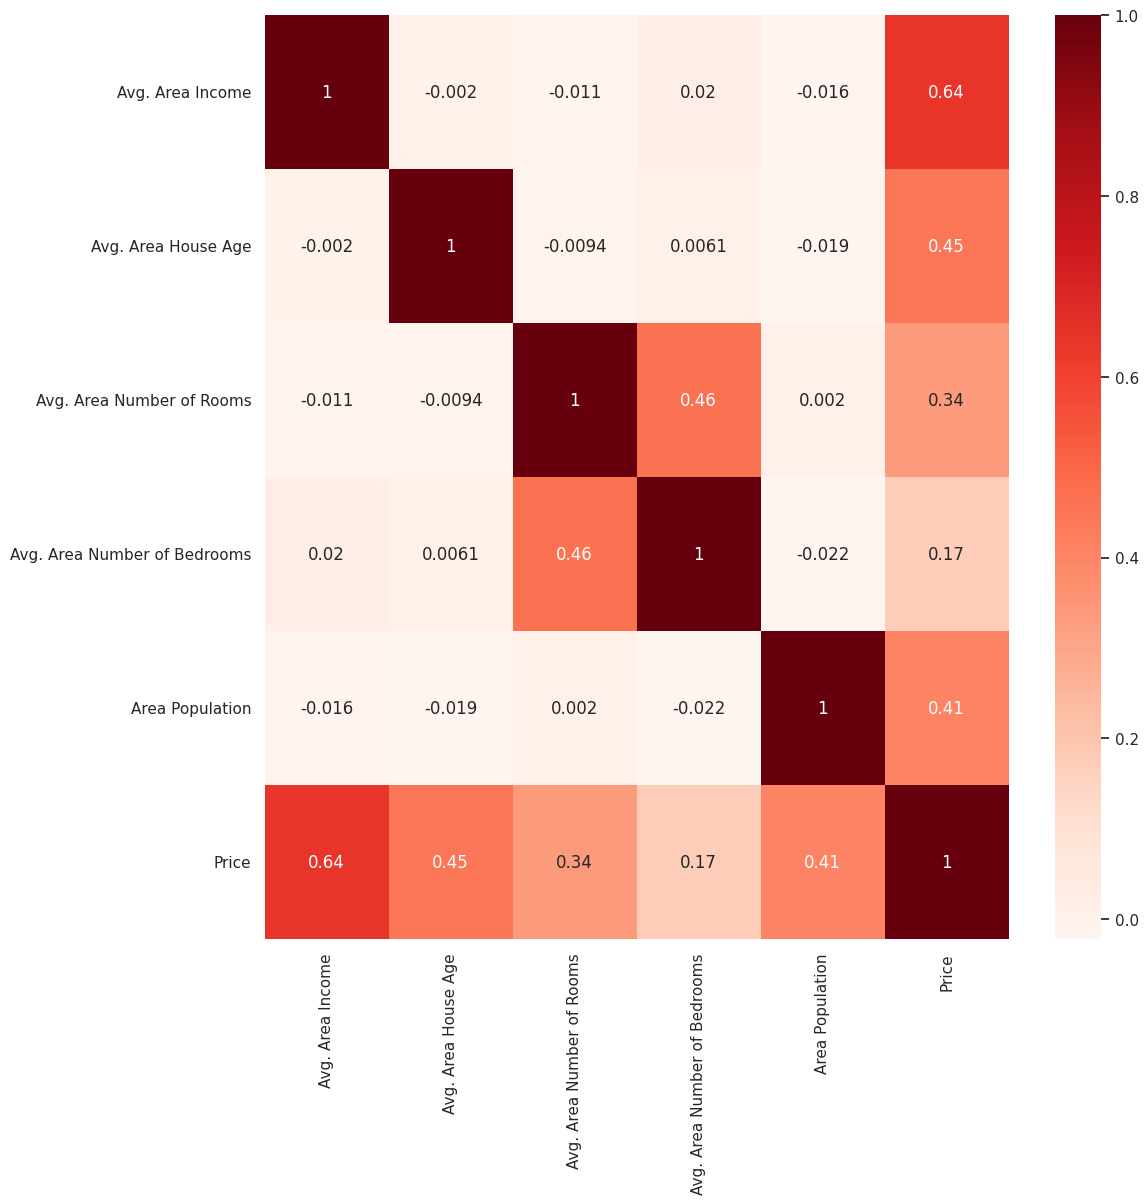

In [ ]:
#Correlation Matrix
plt.figure(figsize=(12, 12))
sns.set()

corr = houses.corr()
sns.heatmap(corr, annot=True, cmap="Reds")

In [ ]:
#Split our Data
X = houses.iloc[:, :-1]
Y = houses.iloc[:, -1:]

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.15, random_state=50
)

In [ ]:
#Model Function
def model_function(model):
    model.fit(X_train, y_train)

    #Get predictions
    pred = model.predict(X_test)

    #Accuracy
    r2 = r2_score(y_test, pred)
    error = mean_squared_error(y_test, pred)

    print(r2)
    print(error)

In [ ]:
linear = LinearRegression()
model_function(linear)

0.9198730225870206
9621296266.24442


In [ ]:
lasso = Lasso()
model_function(lasso)

0.9198730810407594
9621289247.375664


In [ ]:
tree = DecisionTreeRegressor()
model_function(tree)

0.7498562463078757
30036165610.217438


In [ ]:
#Save the Model
import joblib

joblib.dump(linear, "house_price_chatGPT")

['house_price_chatGPT']